# Mono energetic efficiency

### May 9, 2021

## Code

In [5]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re


Welcome to JupyROOT 6.18/04


In [6]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

###Bigger
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.unicode'] = True
# mpl.rcParams['mathtext.rm'] = 'Times New Roman'
# mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
# mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# mpl.rc('font', family='serif', size=12)
# mpl.rcParams['xtick.labelsize'] = 18
# mpl.rcParams['ytick.labelsize'] = 18
# mpl.rcParams['xtick.major.size'] = 8
# mpl.rcParams['ytick.major.size'] = 8

# mpl.rcParams['axes.titlesize'] = 22
# mpl.rcParams['axes.labelsize'] = 22
# # mpl.rc('font', size=16)
# mpl.rc('axes', titlesize=20)

# current_palette = sns.color_palette('colorblind', 10)
# import warnings
# warnings.filterwarnings("ignore")




In [15]:
folder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/"
# f = ROOT.TFile.Open(folder + "storeValues_A2_c1.root","READ")

In [16]:
srcFolder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/storeValues_sim"
file_list=[]#Define an empty list
for filename in os.listdir(srcFolder):#Loop over desired directory
    if filename.endswith("560.root"): #extension, .root in this case
        file_list.append(os.path.join(srcFolder, str(filename))) #add file name to the list
        

In [17]:
VTree = TChain("OutputTreeV")
HTree = TChain("OutputTreeH")
# AllTree = TChain("AllTree")
# OutputTree = TChain("OutputTree")
for line in file_list:
    VTree.AddFile(line)
    HTree.AddFile(line)
#     AllTree.AddFile(line) 
#     OutputTree.AddFile(line)

In [18]:
corrVal_V = []
snr_V = []
weights_V = []
energy = []
pass0 = []
RecoTheta = []
inBox = []
numEntries = VTree.GetEntries()
for event in range(numEntries):
    VTree.GetEntry(event)
    corrVal_V.append(VTree.corr_val_outV)
    snr_V.append(VTree.snr_val_outV)
    weights_V.append(VTree.weight)
    energy.append(VTree.energy_out)
    pass0.append(VTree.pass0)
    RecoTheta.append(VTree.RecoTheta_outV)

In [19]:
df = pd.DataFrame({'energy':abs(np.array(energy)),'weight':np.array(weights_V),'corrVal_V':np.array(corrVal_V), 'snr_V':np.array(snr_V),
                  'pass0':np.array(pass0)})
df.loc[df.snr_V>30].snr_V = 30
df.loc[(df.snr_V>30),'snr_V']=30


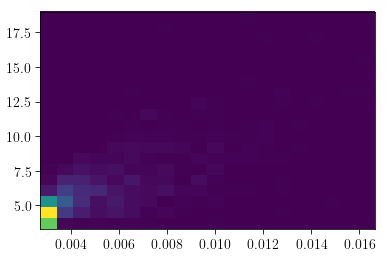

In [20]:
plt.hist2d(df.corrVal_V, df.snr_V, bins=20);

In [21]:
m_V, y_iV = -780,10.4
m_H, y_iH = -720,105

In [22]:
df["passV"] = df.snr_V>m_V*df.corrVal_V+y_iV
# df["passH"] = df.snr_H>m_H*df.corrVal_H+y_iH
df["passes"]= (df.pass0==True) & (df.passV==True)

In [23]:
len(df.loc[(df.passes == True)])/len(df)

0.19576185671039353

## Try 2

In [90]:
m_V, y_iV = -780,10.4
m_H, y_iH = -720,10.5

In [91]:
srcFolder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/storeValues_sim/"
E_ev = []
eff_E = []
for energy in range(560,610,5):
    files = []
    for filename in os.listdir(srcFolder):
        if filename.endswith("E%i.root"%energy):
            f = ROOT.TFile.Open(srcFolder+filename)
            VTree = f.Get("OutputTreeV")
            corrVal_V = []
            snr_V = []
            weights_V = []
            pass0 = []
            RecoTheta = []
            inBox = []
            numEntries = VTree.GetEntries()
            for event in range(numEntries):
                VTree.GetEntry(event)
                corrVal_V.append(VTree.corr_val_outV)
                snr_V.append(VTree.snr_val_outV)
                weights_V.append(VTree.weight)
#                 energy.append(VTree.energy_out)
                pass0.append(VTree.pass0)
                RecoTheta.append(VTree.RecoTheta_outV)
            f.Close()
            df = pd.DataFrame({'energy':abs(np.array(energy)),'weight':np.array(weights_V),'corrVal_V':np.array(corrVal_V), 'snr_V':np.array(snr_V),
                      'pass0':np.array(pass0)})
#             df.loc[(df.snr_V>30),'snr_V']=30
            df = df.loc[(df.snr_V<30)]
            df["passV"] = df.snr_V>m_V*df.corrVal_V+y_iV
            # df["passH"] = df.snr_H>m_H*df.corrVal_H+y_iH
            df["passes"]= (df.pass0==True) & (df.passV==True)
            
            print(len(df.loc[(df.passes == True)])/len(df),0.1*(energy-400))
            eff = len(df.loc[(df.passes == True)])/len(df)
            E_ev.append(0.1*(energy-400))
            eff_E.append(eff)
            

0.19576185671039353 16.0
0.34823316218665057 16.5
0.4626036808942366 17.0
0.5148132573875148 17.5
0.5324132568762756 18.0
0.5570702480729746 18.5
0.5836126966869016 19.0
0.5895014000919463 19.5
0.5933887868639948 20.0
0.6096294076515832 20.5


In [92]:
eff_E

[0.19576185671039353,
 0.34823316218665057,
 0.4626036808942366,
 0.5148132573875148,
 0.5324132568762756,
 0.5570702480729746,
 0.5836126966869016,
 0.5895014000919463,
 0.5933887868639948,
 0.6096294076515832]

## The plot

In [93]:
diffuseEff = pd.read_csv("../data/diffuse_eff.txt")
diffuseEff_OSU = pd.read_csv("../data/diffuse_eff_OSU.txt")
diffuseEff.head()


,energy,eff
0,11300000.0,0.0688
1,18200000.0,0.1100
2,28800000.0,0.1490
3,39600000.0,0.1820
4,60900000.0,0.2090


In [94]:
E_ev = np.power(10,np.array(E_ev))/1E9
E_ev

array([1.00000000e+07, 3.16227766e+07, 1.00000000e+08, 3.16227766e+08,
       1.00000000e+09, 3.16227766e+09, 1.00000000e+10, 3.16227766e+10,
       1.00000000e+11, 3.16227766e+11])

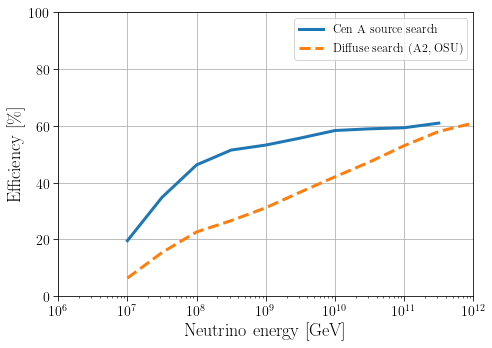

In [95]:
plt.figure(figsize=(7,5))

plt.plot(E_ev, 100*np.array(eff_E),linewidth = 3, label = "Cen A source search")
plt.plot(np.power(10,diffuseEff_OSU.E)/1E9, 100*diffuseEff_OSU["a2_eff"],"--", linewidth = 3, label = "Diffuse search (A2, OSU)")

plt.xscale('log')
plt.xlabel("Neutrino energy [GeV]")
plt.ylabel(r"Efficiency [\%]")
# plt.title("Analysis efficiency")
plt.xlim(1E6,1E12)
plt.ylim(0,100)

plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig("./Eff_Energy_CenASearch.pdf")

## Loop over different resolutions

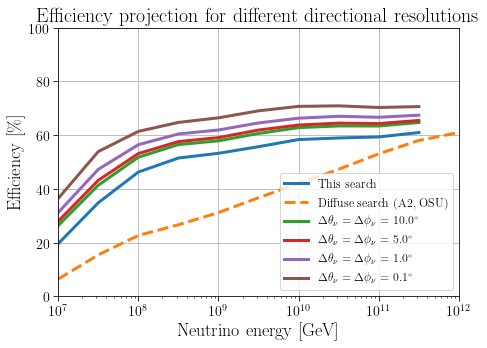

In [96]:
srcFolder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/storeValues_sim/"
plt.figure(figsize=(7,5))
# E_ev = np.power(10,np.array(E_ev))/1E9
plt.plot(E_ev, 100*np.array(eff_E),linewidth = 3, label = "This search")
plt.plot(np.power(10,diffuseEff_OSU.E)/1E9, 100*diffuseEff_OSU["a2_eff"],"--", linewidth = 3, label = "Diffuse search (A2, OSU)")

# # for intercept in np.arange(8.4,10.4+0.4,0.5):
for resolution in np.array([10,5,1,0.1]):
#     resolution = 5
    alpha = (resolution**2)/(360*180)
    m_V, y_iV = -780,10.40-np.log(alpha)/-6.4

    E_ev = []
    eff_E = []
    for energy in range(560,610,5):
        files = []
        for filename in os.listdir(srcFolder):
            if filename.endswith("E%i.root"%energy):
                f = ROOT.TFile.Open(srcFolder+filename)
                VTree = f.Get("OutputTreeV")
                corrVal_V = []
                snr_V = []
                weights_V = []
                pass0 = []
                RecoTheta = []
                inBox = []
                numEntries = VTree.GetEntries()
                for event in range(numEntries):
                    VTree.GetEntry(event)
                    corrVal_V.append(VTree.corr_val_outV)
                    snr_V.append(VTree.snr_val_outV)
                    weights_V.append(VTree.weight)
    #                 energy.append(VTree.energy_out)
                    pass0.append(VTree.pass0)
                    RecoTheta.append(VTree.RecoTheta_outV)
                f.Close()
                df = pd.DataFrame({'energy':abs(np.array(energy)),'weight':np.array(weights_V),'corrVal_V':np.array(corrVal_V), 'snr_V':np.array(snr_V),
                          'pass0':np.array(pass0)})
    #             df.loc[(df.snr_V>30),'snr_V']=30
                df = df.loc[(df.snr_V<30)]
                df["passV"] = df.snr_V>m_V*df.corrVal_V+y_iV
                # df["passH"] = df.snr_H>m_H*df.corrVal_H+y_iH
                df["passes"]= (df.pass0==True) & (df.passV==True)

#                 print(len(df.loc[(df.passes == True)])/len(df),0.1*(energy-400))
                eff = len(df.loc[(df.passes == True)])/len(df)
                E_ev.append(0.1*(energy-400))
                eff_E.append(eff)
    E_ev = np.power(10,np.array(E_ev))/1E9
    plt.plot(E_ev, 100*np.array(eff_E),linewidth = 3, label = r"$\Delta\theta_\nu = \Delta\phi_\nu$ = %0.1f$^\circ$"%resolution)

plt.xscale('log')
plt.xlabel("Neutrino energy [GeV]")
plt.ylabel(r"Efficiency [\%]")
# plt.title("Analysis efficiency")
plt.xlim(1E7,1E12)
plt.ylim(0,100)
plt.title("Efficiency projection for different directional resolutions")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("./Eff_Energy_CenASearch_projection.pdf")
            